In [1]:
from collections import defaultdict, deque
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
def next_states(board):
    # swipe up
    b_up = board.copy()
    for off in [0, 1]:
        if (b_up[0+off] == b_up[2+off] and b_up[0+off]):
            b_up[0+off] = 1+b_up[0+off]
            b_up[2+off] = 0
        elif b_up[0+off] == 0:
            b_up[0+off] = b_up[2+off]
            b_up[2+off] = 0
    # swipe down
    b_down = board.copy()
    for off in [0, 1]:
        if (b_down[0+off] == b_down[2+off] and b_down[0+off]):
            b_down[2+off] = 1+b_down[2+off]
            b_down[0+off] = 0
        elif b_down[2+off] == 0:
            b_down[2+off] = b_down[0+off]
            b_down[0+off] = 0
    # swipe left
    b_left = board.copy()
    for off in [0, 2]:
        if (b_left[0+off] == b_left[1+off] and b_left[0+off]):
            b_left[0+off] = 1+b_left[0+off]
            b_left[1+off] = 0
        elif b_left[0+off] == 0:
            b_left[0+off] = b_left[1+off]
            b_left[1+off] = 0
    # swipe right
    b_right = board.copy()
    for off in [0, 2]:
        if (b_right[0+off] == b_right[1+off] and b_right[0+off]):
            b_right[1+off] = 1+b_right[1+off]
            b_right[0+off] = 0
        elif b_right[1+off] == 0:
            b_right[1+off] = b_right[0+off]
            b_right[0+off] = 0
    return b_up, b_down, b_left, b_right

f = lambda x: 1<<x if x > 0 else 0

class B_thing:
    def __init__(self, b):
        self.b = b.copy()
        self.score = sum((x-1) * (1<<x) if x > 0 else 0 for x in b)
    
    def __str__(self, sep="\n"):
        return f"{f(self.b[0])} {f(self.b[1])}{sep}{f(self.b[2])} {f(self.b[3])}"
        # return ""

    def __eq__(self, other):
        other = other.b
        nw = other.copy()
        for _ in range(4):
            if nw == self.b or nw[2:] + nw[:2] == self.b:
                return True
            nw = [nw[1], nw[3], nw[0], nw[2]]
        return False

    def __hash__(self):
        return self.score

boards_done = set()
solved_boards = set()
edges = defaultdict(set)
def do_rec(start_board, add_edge = 0):
    if B_thing(start_board) in boards_done:
        return
    boards_done.add(B_thing(start_board))
    done_another = 0
    for gah, new_board in enumerate(next_states(start_board)):
        if new_board == start_board:
            # ignore move
            continue
        # add 2 or 4, continue
        if 0 in new_board:
            done_another = 1
            poses = [i for i in range(4) if new_board[i] == 0]
            for p in poses:
                b2 = new_board.copy()
                b2[p] = 1
                print(B_thing(start_board), "\n\|/\n", B_thing(b2), "\n", sep="")
                if add_edge: edges[B_thing(start_board)].add(B_thing(b2))
                do_rec(b2, add_edge=add_edge)
                b3 = new_board.copy()
                b3[p] = 2
                if add_edge: edges[B_thing(start_board)].add(B_thing(b3))
                do_rec(b3, add_edge=add_edge)

    if done_another == 0:
        solved_boards.add(B_thing(start_board))

In [3]:
boards_done = set()
solved_boards = set()
do_rec([1, 0, 0, 0], add_edge=1)
do_rec([2, 0, 0, 0], add_edge=1)
print(len(boards_done), len(solved_boards))
for x in solved_boards:
    print(x.__str__(" "), x.score)

2 0
0 0
\|/
2 0
2 0

2 0
2 0
\|/
4 2
0 0

4 2
0 0
\|/
2 0
4 2

2 0
4 2
\|/
2 2
4 2

2 2
4 2
\|/
2 4
4 2

2 4
4 4
\|/
2 8
4 2

2 8
4 4
\|/
2 8
8 2

2 8
4 4
\|/
2 8
2 8

2 8
2 8
\|/
4 16
2 0

4 16
2 0
\|/
4 2
2 16

4 4
2 16
\|/
8 2
2 16

4 4
2 16
\|/
2 8
2 16

2 8
2 16
\|/
4 8
2 16

4 8
4 16
\|/
8 8
2 16

8 8
2 16
\|/
16 2
2 16

8 8
2 16
\|/
2 16
2 16

2 16
2 16
\|/
4 32
2 0

4 32
2 0
\|/
4 2
2 32

4 4
2 32
\|/
8 2
2 32

4 4
2 32
\|/
2 8
2 32

2 8
2 32
\|/
4 8
2 32

4 8
4 32
\|/
8 8
2 32

8 8
2 32
\|/
16 2
2 32

8 8
2 32
\|/
2 16
2 32

2 16
2 32
\|/
4 16
2 32

4 16
4 32
\|/
8 16
2 32

4 16
4 32
\|/
2 16
8 32

2 16
2 32
\|/
2 16
4 32

8 8
4 32
\|/
16 2
4 32

8 8
4 32
\|/
2 16
4 32

4 8
4 32
\|/
2 8
8 32

2 8
2 32
\|/
2 8
4 32

4 32
2 0
\|/
4 32
2 2

4 32
2 2
\|/
4 32
4 2

4 32
4 4
\|/
8 32
2 4

4 32
4 4
\|/
2 32
8 4

4 32
4 4
\|/
4 32
8 2

4 32
4 4
\|/
4 32
2 8

4 32
2 2
\|/
4 32
2 4

4 32
4 0
\|/
8 32
2 0

8 32
2 0
\|/
8 2
2 32

8 32
2 0
\|/
8 32
2 2

8 32
4 0
\|/
8 2
4 32

8 32
4 0
\|/


In [4]:
# create a score thing
l = list(boards_done)
l.sort(key=lambda x: (x.score, min(x.b), sum(a>0 for a in x.b)))
pred_scr = defaultdict(int)
for x in reversed(l):
    print("DOING", x.__str__(" "))
    if x in solved_boards:
        pred_scr[x] = x.score
        print("SOLVED", pred_scr[x])
        continue
    vals = []
    for nw in next_states(x.b):
        if nw != x.b:
            print("\tNW", B_thing(nw).__str__(" "))
            poses = [i for i in range(4) if nw[i] == 0]
            v = 0
            for p in poses:
                b2 = nw.copy()
                b2[p] = 1
                print("\t\tB2", B_thing(b2).__str__(" "), "adding",(1/len(poses)), 0.9, pred_scr[B_thing(b2)], (1/(len(poses)))*0.9*pred_scr[B_thing(b2)])
                v += (1/len(poses))*0.9*pred_scr[B_thing(b2)]
                b3 = nw.copy()
                b3[p] = 2
                print("\t\tB3", B_thing(b3).__str__(" "), "adding", (1/len(poses)), 0.1, pred_scr[B_thing(b3)], (1/(len(poses)))*0.9*pred_scr[B_thing(b3)])
                v += (1/len(poses))*0.1*pred_scr[B_thing(b3)]
            vals.append(v)
    pred_scr[x] = max(vals)
    print(x.__str__(" "), pred_scr[x])

DOING 4 16 8 32
SOLVED 196
DOING 8 16 4 32
SOLVED 196
DOING 2 16 8 32
SOLVED 192
DOING 8 16 2 32
SOLVED 192
DOING 16 4 4 32
SOLVED 184
DOING 4 16 4 32
	NW 8 16 0 32
		B2 8 16 2 32 adding 1.0 0.9 192 172.8
		B3 8 16 4 32 adding 1.0 0.1 196 176.4
	NW 0 16 8 32
		B2 2 16 8 32 adding 1.0 0.9 192 172.8
		B3 4 16 8 32 adding 1.0 0.1 196 176.4
4 16 4 32 192.4
DOING 2 16 4 32
SOLVED 180
DOING 4 16 2 32
SOLVED 180
DOING 16 4 2 32
SOLVED 180
DOING 2 16 2 32
	NW 4 16 0 32
		B2 4 16 2 32 adding 1.0 0.9 180 162.0
		B3 4 16 4 32 adding 1.0 0.1 192.4 173.16
	NW 0 16 4 32
		B2 2 16 4 32 adding 1.0 0.9 180 162.0
		B3 4 16 4 32 adding 1.0 0.1 192.4 173.16
2 16 2 32 181.24
DOING 16 2 2 32
SOLVED 176
DOING 4 8 8 32
SOLVED 164
DOING 8 8 4 32
	NW 16 0 4 32
		B2 16 2 4 32 adding 1.0 0.9 180 162.0
		B3 16 4 4 32 adding 1.0 0.1 184 165.6
	NW 0 16 4 32
		B2 2 16 4 32 adding 1.0 0.9 180 162.0
		B3 4 16 4 32 adding 1.0 0.1 192.4 173.16
8 8 4 32 181.24
DOING 2 8 8 32
SOLVED 160
DOING 8 8 2 32
	NW 16 0 2 32
		B2 16

In [5]:
# prob = defaultdict(int)
# prob[B_thing([2, 0, 0, 0])] = 0.9
# prob[B_thing([4, 0, 0, 0])] = 0.1
# initial_states = deque([B_thing([2, 0, 0, 0]), B_thing([4, 0, 0, 0])])
# while initial_states:
#     state = initial_states.popleft()
#     for new_state in edges[state]:
#         sc_diff = new_state.score - state.score
#         if sc_diff == 2:
#             prob[new_state] += prob[state] * 0.9
#         elif sc_diff == 4:
#             prob[new_state] += prob[state] * 0.1

In [6]:
len(edges), 112-36

(76, 76)

In [7]:
sum(len(x) for x in edges.values())

290

In [8]:

# o4 mini high
def spring_layout_fixed_x(G, x_fixed, **spring_kwargs):
    """
    G           – a NetworkX graph
    x_fixed     – dict {node: x_coordinate} that you want to hold
    spring_kwargs – passed on to nx.spring_layout (e.g. k, iterations…)

    Returns a pos dict {node: (x_fixed[node], y_opt)}.
    """
    # 1) build an initial “pos” dict with your x and dummy y=0
    pos0 = {n: np.array([x_fixed[n], 0.0]) for n in G}
    # 2) let spring_layout mess with both x & y
    pos = nx.spring_layout(G, pos=pos0, **spring_kwargs)
    # 3) then stick back your x-coordinates
    for n, (x, y) in pos.items():
        pos[n] = (x_fixed[n], y)
    return pos

def spectral_y_with_fixed_x(G, x_fixed, **spectral_kwargs):
    """
    G           – a NetworkX graph
    x_fixed     – dict {node: x_coordinate} that you want to hold
    spectral_kwargs – passed on to nx.spectral_layout (e.g. weight, scale…)

    Returns pos dict {node: (x_fixed[node], y_opt)} using the 2nd eigenvector.
    """
    # get the 2D spectral embedding
    pos2d = nx.spectral_layout(G, **spectral_kwargs)
    # pos2d[n] = (eigvec1[n], eigvec2[n]) so we take the second component
    return {n: (x_fixed[n], pos2d[n][1]) for n in G}

# # — example usage —
# if __name__ == "__main__":
#     G = nx.path_graph(7)
#     # suppose you want your nodes laid out along x = 0,1,2,3,4,5,6
#     x_fixed = {n: float(n) for n in G.nodes()}
    
#     nx.draw(G, pos, with_labels=True)


In [9]:
next_states([1, 1, 0, 1])

([1, 2, 0, 0], [0, 0, 1, 2], [2, 0, 1, 0], [0, 2, 0, 1])

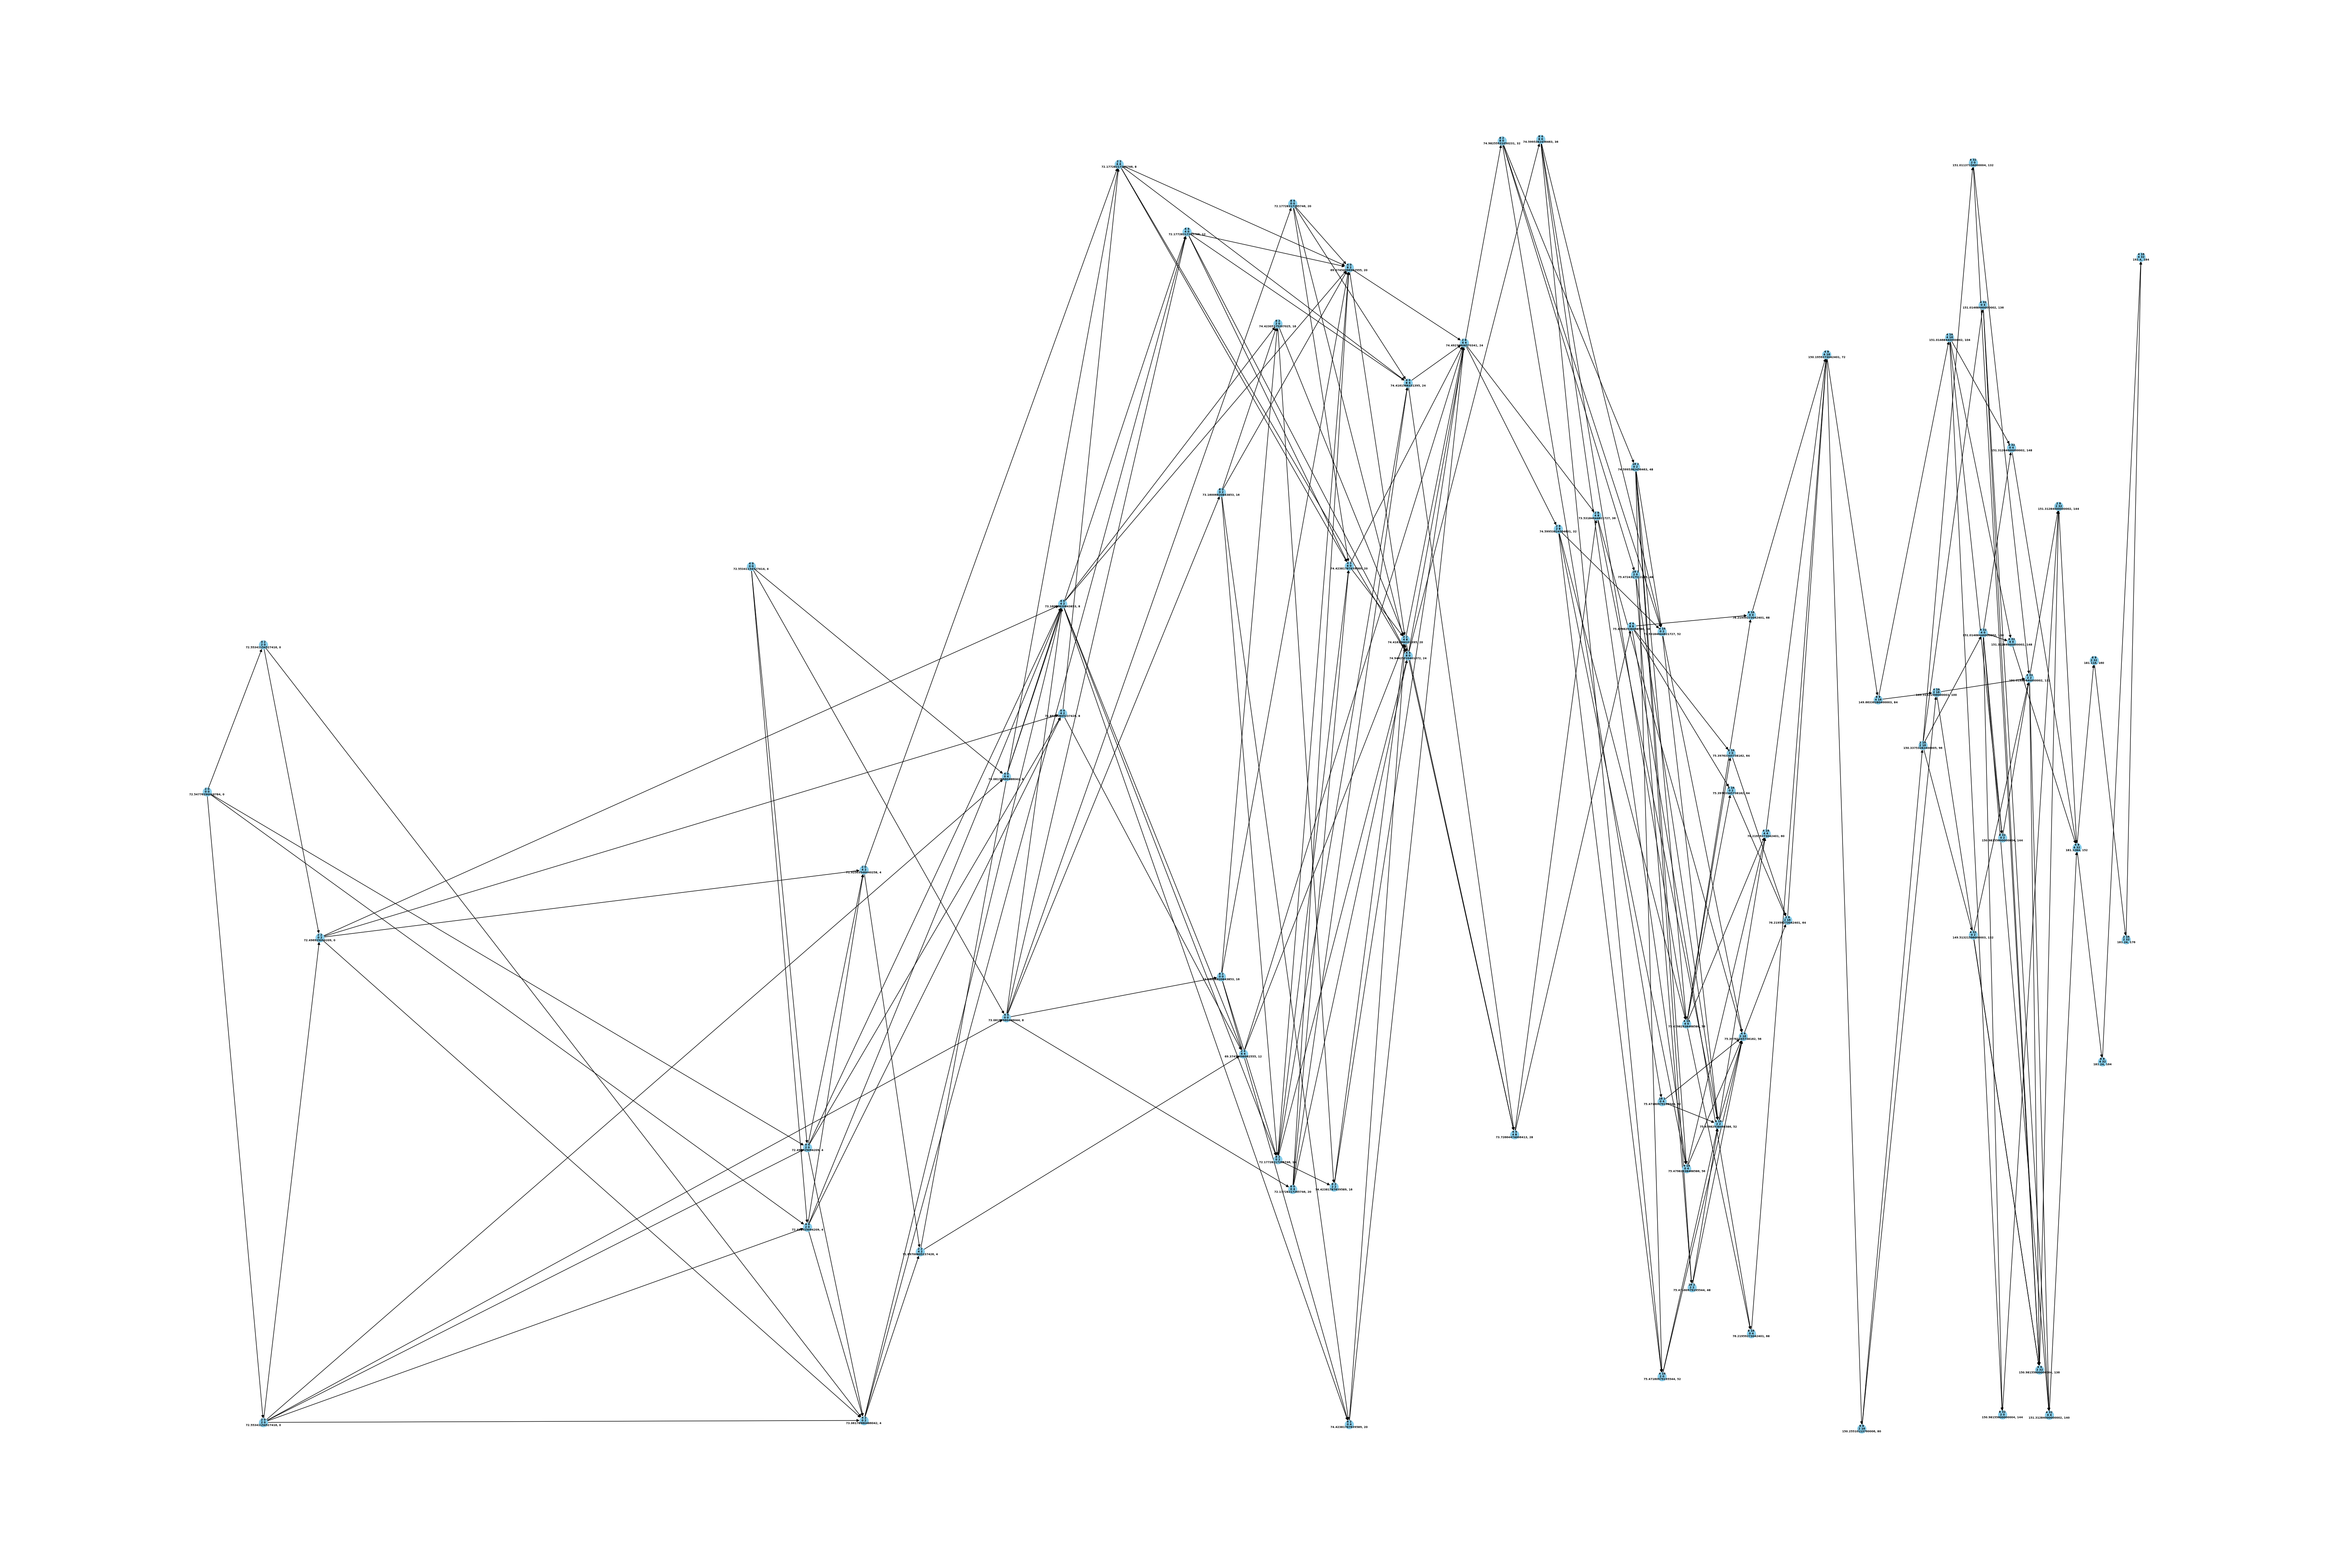

In [13]:
G = nx.DiGraph()
for k, v in edges.items():
    for x in v:
        if x in edges.keys():
            G.add_edge(k, x)
mapping = nx.spring_layout(G, iterations=5)
for k in G.nodes():
    mapping[k] = (np.log(k.score+1)*30 + sum(bool(x) for x in k.b)*5, random.random()*200)   
c = B_thing.__str__
B_thing.__str__ = lambda self: f"{f(self.b[0])} {f(self.b[1])}\n{f(self.b[2])} {f(self.b[3])}" + f"\n{pred_scr[self]}, {self.score}"
# make large figure
plt.figure(figsize=(15*4, 10*4))
nx.draw(G, pos=mapping, with_labels=True, node_size=250, node_color="skyblue", font_size=5, font_weight="bold")
B_thing.__str__ = c

In [11]:
dct = {"up": 0, "down": 1, "left": 2, "right": 3}
class Game2048:
    def __init__(self, other=None):
        if other == None:
            self.board = np.zeros((4, 4), dtype=int)
            self.score = 0
        else:
            self.board = other.board.copy()
            self.score = other.score
        self.spawn()
        self.done = False

    def spawn(self):
        empty_cells = np.argwhere(self.board == 0)
        if len(empty_cells) == 0:
            self.done = True
            return
        cell = empty_cells[np.random.choice(len(empty_cells))]
        self.board[cell[0], cell[1]] = np.random.choice([2, 4], p=[0.9, 0.1])
    
    def move(self, dirr):
        moved = False
        if dirr == 0:
            for col in range(4):
                for row in range(3):
                    if self.board[row, col] == self.board[row + 1, col]:
                        self.board[row, col] *= 2
                        self.score += self.board[row, col]
                        self.board[row + 1, col] = 0
                        moved = True
        elif dirr == 1:
            for col in range(4):
                for row in range(3, 0, -1):
                    if self.board[row, col] == self.board[row - 1, col]:
                        self.board[row, col] *= 2
                        self.score += self.board[row, col]
                        self.board[row - 1, col] = 0
                        moved = True
        elif dirr == 2:
            for row in range(4):
                for col in range(3):
                    if self.board[row, col] == self.board[row, col + 1]:
                        self.board[row, col] *= 2
                        self.score += self.board[row, col]
                        self.board[row, col + 1] = 0
                        moved = True
        elif dirr == 3:
            for row in range(4):
                for col in range(3, 0, -1):
                    if self.board[row, col] == self.board[row, col - 1]:
                        self.board[row, col] *= 2
                        self.score += self.board[row, col]
                        self.board[row, col - 1] = 0
                        moved = True
        if moved:
            self.spawn()
        return moved

    def valid_moves(self):
        valid = []
        for i in range(4):
            b = Game2048(self)
            if b.move(i):
                valid.append(i)
        return valid


